In [1]:
import numpy as np
import matplotlib.pyplot as plt
import qclab.simulation as simulation
from qclab.models.donor_bridge_acceptor import DonorBridgeAcceptorModel
from qclab.algorithms.mf import MeanFieldDynamics
from qclab.algorithms.fssh import FewestSwitchesSurfaceHoppingDynamics
from qclab.algorithms.cfssh import CoherentFewestSwitchesSurfaceHoppingDynamics
from qclab.drivers.ray_driver import dynamics_parallel_ray

In [1]:
import numpy as np
import matplotlib.pyplot as plt   
from qclab.models.donor_bridge_acceptor import DonorBridgeAcceptorModel
import qclab.auxiliary as auxiliary
input_params = dict(temp = 0.1, V=1, E_D=0, E_B=0, E_A=0, A=100, W=1, l_reorg=.025)
model = DonorBridgeAcceptorModel(input_params = input_params)

model.batch_size = 100
model.tmax=10
model.dt_output=0.01
model.dt=0.01

model.wf_db = np.zeros((model.num_states),dtype=complex)
# initialize a quantum state in the upper state
model.wf_db[0] = 1

num_seeds = 1*model.batch_size
seeds = np.arange(0, num_seeds)

# import the mean-field dynamics Algorithm Class
from qclab.recipes import MeanFieldDynamicsRecipe
recipe_mf = MeanFieldDynamicsRecipe(model)
# import the serial driver 
from qclab.drivers.serial_driver import dynamics_serial
# import the simulation data class
import qclab.simulation as simulation


data_mf = dynamics_serial(recipe=recipe_mf, model = model, seeds = seeds, ncpus=1, data = simulation.Data())

100%|██████████| 1/1 [00:04<00:00,  4.06s/it]


In [2]:
input_params = dict(temp = 0.1, V=1, E_D=0, E_B=0, E_A=0, A=100, W=1, l=.025)
sim = DonorBridgeAcceptorModel(input_params = input_params)

sim.num_trajs = 10
sim.tmax=1+int(0.5/0.0260677)
sim.dt=1/(10*sim.w[-1])
sim.dt_output=2*sim.dt

sim.wf_db = np.zeros((sim.num_states),dtype=complex)
sim.wf_db[0] = 1


nprocs = 8
num_seeds = 20*sim.num_trajs
seeds = np.arange(0, num_seeds)
data_mf = dynamics_parallel_ray(MeanFieldDynamics, sim, seeds, nprocs, simulation.Data())

2024-07-15 13:56:24,780	INFO worker.py:1771 -- Started a local Ray instance.
  0%|          | 0/3 [00:00<?, ?it/s](raylet) [2024-07-15 13:56:34,709 E 1167975 1167997] (raylet) file_system_monitor.cc:111: /tmp/ray/session_2024-07-15_13-56-23_172861_1167860 is over 95% full, available space: 18828636160; capacity: 493949374464. Object creation will fail if spilling is required.
(raylet) [2024-07-15 13:56:44,726 E 1167975 1167997] (raylet) file_system_monitor.cc:111: /tmp/ray/session_2024-07-15_13-56-23_172861_1167860 is over 95% full, available space: 18828599296; capacity: 493949374464. Object creation will fail if spilling is required.
100%|██████████| 3/3 [00:39<00:00, 13.33s/it]


In [3]:
input_params = dict(temp = 0.1, V=1, E_D=0, E_B=0, E_A=0, A=100, W=1, l=.025)
sim = DonorBridgeAcceptorModel(input_params = input_params)

sim.num_trajs = 10
sim.tmax=1+int(0.5/0.0260677)
sim.dt=1/(10*sim.w[-1])
sim.dt_output=2*sim.dt

sim.wf_db = np.zeros((sim.num_states),dtype=complex)
sim.wf_db[0] = 1


nprocs = 8
num_seeds = 20*sim.num_trajs
seeds = np.arange(0, num_seeds)
data_fssh = dynamics_parallel_ray(FewestSwitchesSurfaceHoppingDynamics, sim, seeds, nprocs, simulation.Data())

2024-07-15 13:57:08,375	INFO worker.py:1771 -- Started a local Ray instance.
  0%|          | 0/3 [00:00<?, ?it/s](raylet) [2024-07-15 13:57:18,297 E 1168679 1168701] (raylet) file_system_monitor.cc:111: /tmp/ray/session_2024-07-15_13-57-06_686485_1167860 is over 95% full, available space: 18828005376; capacity: 493949374464. Object creation will fail if spilling is required.
(raylet) [2024-07-15 13:57:28,314 E 1168679 1168701] (raylet) file_system_monitor.cc:111: /tmp/ray/session_2024-07-15_13-57-06_686485_1167860 is over 95% full, available space: 18827956224; capacity: 493949374464. Object creation will fail if spilling is required.
(raylet) [2024-07-15 13:57:38,333 E 1168679 1168701] (raylet) file_system_monitor.cc:111: /tmp/ray/session_2024-07-15_13-57-06_686485_1167860 is over 95% full, available space: 18827747328; capacity: 493949374464. Object creation will fail if spilling is required.
(raylet) [2024-07-15 13:57:48,354 E 1168679 1168701] (raylet) file_system_monitor.cc:111: /

In [12]:
input_params = dict(temp = 0.1, V=1, E_D=0, E_B=0, E_A=0, A=100, W=1, l=.025)
sim = DonorBridgeAcceptorModel(input_params = input_params)

sim.num_trajs = 10
sim.tmax=1+int(0.5/0.0260677)
sim.dt=1/(10*sim.w[-1])
sim.dt_output=2*sim.dt

sim.wf_db = np.zeros((sim.num_states),dtype=complex)
sim.wf_db[0] = 1


nprocs = 8
num_seeds = 20*sim.num_trajs
seeds = np.arange(0, num_seeds)
data_cfssh = dynamics_parallel_ray(CoherentFewestSwitchesSurfaceHoppingDynamics, sim, seeds, nprocs, simulation.Data())

2024-07-15 14:07:02,087	INFO worker.py:1771 -- Started a local Ray instance.
  0%|          | 0/3 [00:00<?, ?it/s](raylet) [2024-07-15 14:07:11,999 E 1171290 1171312] (raylet) file_system_monitor.cc:111: /tmp/ray/session_2024-07-15_14-07-00_500965_1167860 is over 95% full, available space: 18826477568; capacity: 493949374464. Object creation will fail if spilling is required.
(raylet) [2024-07-15 14:07:22,029 E 1171290 1171312] (raylet) file_system_monitor.cc:111: /tmp/ray/session_2024-07-15_14-07-00_500965_1167860 is over 95% full, available space: 18826420224; capacity: 493949374464. Object creation will fail if spilling is required.
(raylet) [2024-07-15 14:07:32,046 E 1171290 1171312] (raylet) file_system_monitor.cc:111: /tmp/ray/session_2024-07-15_14-07-00_500965_1167860 is over 95% full, available space: 18826379264; capacity: 493949374464. Object creation will fail if spilling is required.
(raylet) [2024-07-15 14:07:42,070 E 1171290 1171312] (raylet) file_system_monitor.cc:111: /

(12734, 3)
(12734,)
(12734,)


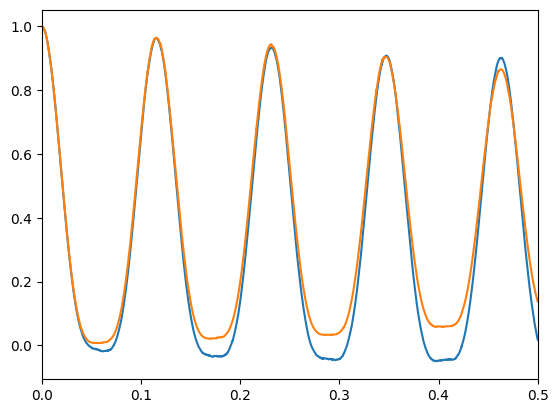

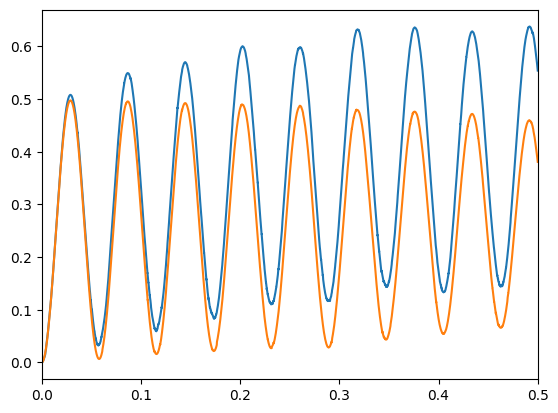

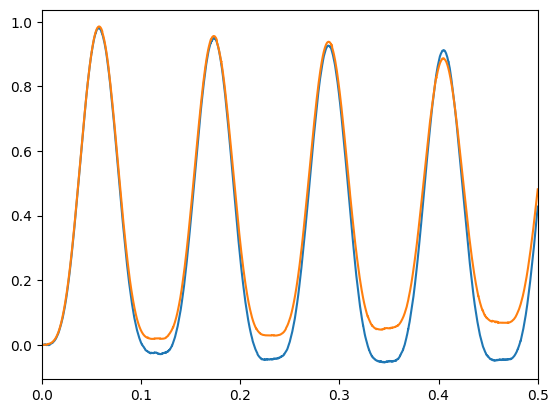

In [13]:
pops_fssh = np.real(np.einsum('nii->ni',data_fssh.data_dic['dm_db']))
print(np.shape(pops_fssh))
t_ps = data_fssh.data_dic['t']*0.0260677
ntraj = np.sum(pops_fssh[0])
t_ps = t_ps/ntraj
pops_fssh = pops_fssh/ntraj
print(np.shape(t_ps))


pops_cfssh = np.real(np.einsum('nii->ni',data_cfssh.data_dic['dm_db']))
t_ps = data_cfssh.data_dic['t']*0.0260677
ntraj = np.sum(pops_cfssh[0])
t_ps = t_ps/ntraj
print(np.shape(t_ps))
pops_cfssh = pops_cfssh/ntraj

plt.plot(t_ps,pops_fssh[:,0])
plt.plot(t_ps,pops_cfssh[:,0])
plt.xlim([0,0.5])
plt.show()
plt.plot(t_ps,pops_fssh[:,1])
plt.plot(t_ps,pops_cfssh[:,1])
plt.xlim([0,0.5])
plt.show()
plt.plot(t_ps,pops_fssh[:,2])
plt.plot(t_ps,pops_cfssh[:,2])
plt.xlim([0,0.5])
plt.show()